# Getting started with xgcm for MOM6

* MOM6 variables are staggered according to the Arakawa C-grid 
* It uses a north-east index convention
* center points are labelled (xh, yh) and corner points are labelled (xq, yq)
* important: variables xh/yh, xq/yq that are named "nominal" longitude/latitude **are not** the true geographical coordinates and are not suitable for plotting (more later)

See [indexing](https://mom6.readthedocs.io/en/dev-gfdl/api/generated/pages/Horizontal_indexing.html) for details.

In [1]:
import xarray as xr
from xgcm import Grid
import warnings
import matplotlib.pylab as plt
from cartopy import crs as ccrs
import numpy as np

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

For this tutorial, we are going to use sample data for the $\frac{1}{2}^{\circ}$ global model OM4p05 hosted on a GFDL thredds server:

In [3]:
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1}, drop_variables=['average_DT',
                                                                  'average_T1',
                                                                  'average_T2'],
                     engine='pydap')

In [4]:
ds

<xarray.Dataset>
Dimensions:       (nv: 2, time: 60, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * z_i           (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l           (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * time          (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
Data variables:
    Coriolis      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello     (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_bu  (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cu  (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cv  (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    hfgeou        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    thkcello      (z_l, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    wet           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_c         (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_u         (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_v         (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    so            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    time_bnds     (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao        (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    umo           (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    uo            (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vmo           (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vo            (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    volcello      (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    zos           (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
Attributes:
    filename:                        ocean_monthly.200301

## xgcm grid definition

* The horizontal dimensions are a combination of (xh or xq) and (yh or yq) corresponding to the staggered point. In the vertical z_l refers to the depth of the center of the layer and z_i to the position of the interfaces, such as len(z_i) = len(z_l) +1.

* the geolon/geolat family are the **TRUE** geographical coordinates and are the longitude/latitude you want to use to plot results. The subscript correspond to the staggered point (c: corner, u: U-point, v: V-point, no subscript: center)

* the areacello family is the area of the ocean cell at various points with a slightly naming convention (bu: corner, cu: U-point, cv: V-point, no subscript: center). The cell area can be computed by:

   $$areacello = dxt * dyt$$

* the dx/dy family has the following naming convention: dx(Cu: U-point, Cv: V-point, no suffix: center)

* thkcello is the layer thickness for each cell (variable). volcello is the volume of the cell, such as:

  $$volcello = areacello * thkcello$$


The MOM6 output can be written in Symetric (**len(Xq) = len(Xh) + 1**) or Non-symetric mode (**len(Xq) = len(Xh)**), where X is a notation for both x and y. In Symetric mode, one would define the grid for the global as:

```python
grid = Grid(ds, coords={'X': {'inner': 'xh', 'outer': 'xq'},
                        'Y': {'inner': 'yh', 'outer': 'yq'},
                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])
```

and in Non-symetric mode:

```python

grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])
```

Of course, **don't forget to drop the periodic option if you're running a regional model**. Our data is written in Non-symetric mode hence:

In [5]:
grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

## A note on geographical coordinates

MOM6 uses land processor elimination, which creates blank holes in the produced geolon/geolat fields. This can result in problems while plotting. It is recommended to overwrite them by the full arrays that are produced by running the model for a few steps without land processor elimination. Here we copy one of these files.

In [6]:
!curl -O https://raw.githubusercontent.com/raphaeldussin/MOM6-AnalysisCookbook/master/tutorials/data/ocean_grid_sym_OM4_05.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6512k  100 6512k    0     0  4212k      0  0:00:01  0:00:01 --:--:-- 4212k


In [7]:
ocean_grid_sym = xr.open_dataset('ocean_grid_sym_OM4_05.nc')

In [8]:
ocean_grid_sym

<xarray.Dataset>
Dimensions:   (xh: 720, xq: 721, yh: 576, yq: 577)
Coordinates:
  * xh        (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq        (xq) float64 -300.0 -299.5 -299.0 -298.5 ... 58.5 59.0 59.5 60.0
  * yh        (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq        (yq) float64 -78.0 -77.82 -77.63 -77.45 ... 89.37 89.58 89.79 90.0
Data variables:
    geolat    (yh, xh) float32 ...
    geolat_c  (yq, xq) float32 ...
    geolon    (yh, xh) float32 ...
    geolon_c  (yq, xq) float32 ...
Attributes:
    filename:   19000101.ocean_static.nc
    title:      OM4_SIS2_cgrid_05
    grid_type:  regular
    grid_tile:  N/A
    history:    Tue Mar  3 13:41:58 2020: ncks -v geolon,geolon_c,geolat,geol...
    NCO:        4.0.3

I took here a symetric grid for the purpose of showing the differences. Since this grid is symetric and MOM6 uses the north-east convention, we need to remove the first row and column in our arrays.

To overwrite our "gruyere" coordinates in our Non-symetric dataset, we can do:

In [9]:
ds['geolon_c'] = xr.DataArray(data=ocean_grid_sym['geolon_c'][1:,1:], dims=('yq', 'xq'))
ds['geolat_c'] = xr.DataArray(data=ocean_grid_sym['geolat_c'][1:,1:], dims=('yq', 'xq'))

ds['geolon'] = xr.DataArray(data=ocean_grid_sym['geolon'], dims=('yh', 'xh'))
ds['geolat'] = xr.DataArray(data=ocean_grid_sym['geolat'], dims=('yh', 'xh'))

## Vorticity computation

We can borrow the expression for vorticity from the MITgcm example and adapt it for MOM6:

In [10]:
vorticity = ( - grid.diff(ds.uo * ds.dxCu, 'Y', boundary='fill')
              + grid.diff(ds.vo * ds.dyCv, 'X', boundary='fill') ) / ds.areacello_bu

In [11]:
vorticity

<xarray.DataArray (time: 60, z_l: 35, yq: 576, xq: 720)>
dask.array<truediv, shape=(60, 35, 576, 720), dtype=float32, chunksize=(1, 1, 575, 719), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * yq       (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.37 89.58 89.79 90.0
  * xq       (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0

Let's take the surface relative vorticity at the first time record and make a xarray standard plot and see how it looks:

In [12]:
data_plot = 1e5 * vorticity.isel(time=0, z_l=0)
data_plot.load()

<xarray.DataArray (yq: 576, xq: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     object 2003-01-16 12:00:00
    z_l      float64 2.5
  * yq       (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.37 89.58 89.79 90.0
  * xq       (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 58.5 59.0 59.5 60.0

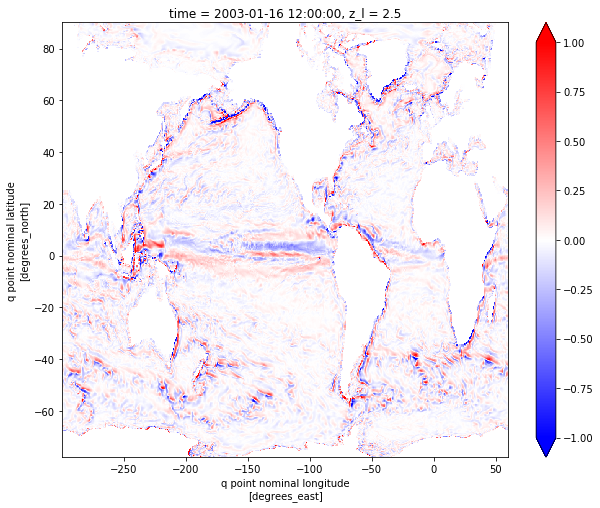

In [13]:
data_plot.plot(figsize=[10,8], vmin=-1, vmax=1, cmap='bwr')

## Plotting

Here we want to be careful and make sure we use the right set of coordinates (geolon_c/geolat_c). Since they are not present in the DataArray, we can add them easily with:

In [14]:
data_plot = data_plot.assign_coords({'geolon_c': ds['geolon_c'],
                                     'geolat_c': ds['geolat_c']})

Now let's define a function that will produce a publication-quality plot:

In [15]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

def OM_global_plot_plan(da, vmin=-999, vmax=999,
                        lon='geolon', lat='geolat', landcolor=1.,
                        cmap='jet', title='what is it?'):
    """ standard global plot for OM4 data array """

    fig = plt.figure(figsize=[16,10])
    ax = plt.axes(projection=ccrs.PlateCarree())

    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 18, 'color': 'black'}
    gl.ylabel_style = {'size': 18, 'color': 'black'}

    cf = da.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                          x=lon, y=lat,
                          vmin=vmin, vmax=vmax,
                          add_labels=False,
                          add_colorbar=False,
                          cmap=cmap)
    # add separate colorbar
    cb = plt.colorbar(cf, shrink=0.65)
    cb.ax.tick_params(labelsize=20)

    # create a land 'topo' array with uniform value (0 < landcolor < 2)
    topo = xr.DataArray(data=landcolor * np.ones(da.shape), dims=da.dims)
    # make it exist only when ocean data is nan
    topo = topo.where(np.isnan(da))
    # assign true coords
    topo = topo.assign_coords({lon: da[lon],
                               lat: da[lat]})
    # plot
    _ = topo.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                             x=lon, y=lat, cmap='binary',
                             vmin=0, vmax=2, add_labels=False,
                             add_colorbar=False)


    # title
    _ = plt.title(title, fontsize=18)
    return fig

And give it a go:

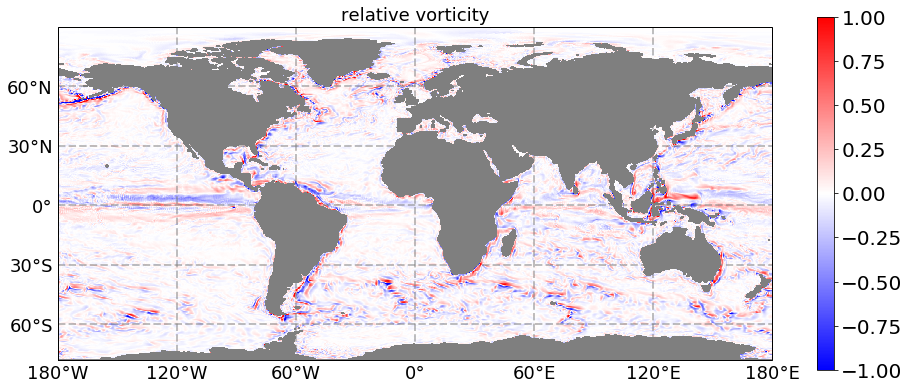

In [16]:
fig = OM_global_plot_plan(data_plot, vmin=-1, vmax=1, 
                          lon='geolon_c', lat='geolat_c', landcolor=1.,
                          cmap='bwr', title='relative vorticity')

Please look at the MITgcm examples for more about what xgcm can do. Also for MOM6 analysis examples using xarray and its companion software, please visit the [MOM6 Analysis Cookbook](https://mom6-analysiscookbook.readthedocs.io/en/latest/index.html).